In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

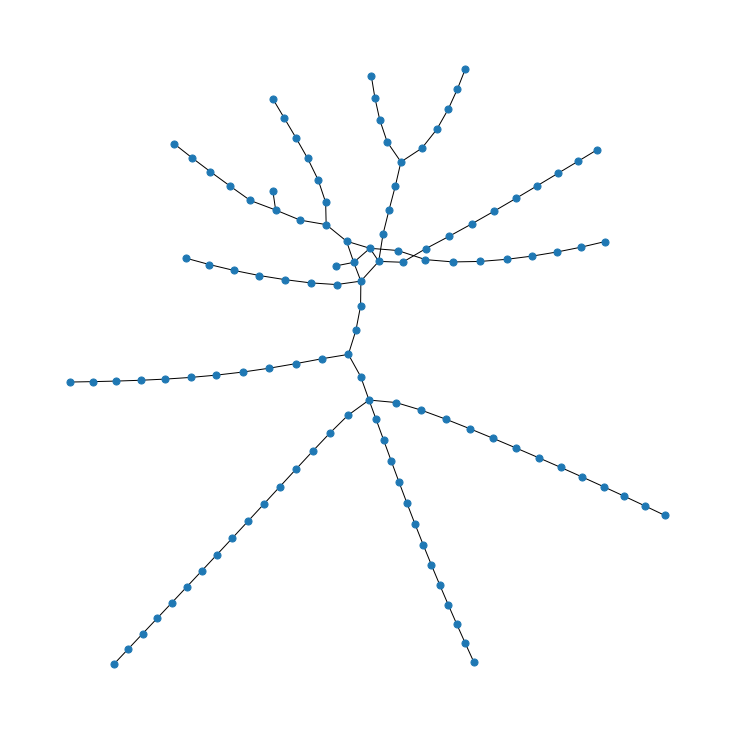

In [5]:
def open_line_file(filename):
    with open(f'../lines_from_gtfs_static_data/{filename}.txt', 'r') as f:
      lines = f.readlines()
    return lines

line_files = [
    'Red-C1-0',
    'Red-C1-1',
    'Red-C2-0',
    'Red-C2-1',
    'Green-B-C1-0',
    'Green-B-C1-1',
    'Green-C-C1-0',
    'Green-C-C1-1',
    'Green-D-C1-0',
    'Green-D-C1-1',
    'Green-E-C1-0',
    'Green-E-C1-1',
    'Orange-C1-0',
    'Orange-C1-1',
    'Blue-C1-0',
    'Blue-C1-1'
]

line_stations = map(open_line_file, line_files)

stations = set()
edges = set()

for line in line_stations:
    for i in range(len(line)-1):
        stop_name = line[i].rstrip()
        next_stop_name = line[i+1].rstrip()
        stations.add(stop_name)
        edges.add((stop_name, next_stop_name))
    end_stop_name = line[-1].rstrip()
    stations.add(end_stop_name)

network = nx.Graph()
network.add_nodes_from(stations)
network.add_edges_from(edges)

fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network)
nx.draw(network, layout, node_size=50)

In [6]:
NL = list(network)
NL

['Hawes Street',
 'Quincy Center',
 'Coolidge Corner',
 'Heath Street',
 'Broadway',
 'Massachusetts Avenue',
 'Bowdoin',
 'Forest Hills',
 'Washington Street',
 'Brookline Hills',
 'Magoun Square',
 'Northeastern University',
 'Griggs Street',
 'Quincy Adams',
 'Kenmore',
 'Wood Island',
 'Roxbury Crossing',
 'Union Square',
 'Downtown Crossing',
 'Boylston',
 'Newton Highlands',
 'Mission Park',
 'Wellington',
 'Stony Brook',
 'North Station',
 'Maverick',
 'Amory Street',
 'Haymarket',
 'Beachmont',
 'Savin Hill',
 'Harvard Avenue',
 'Hynes Convention Center',
 'Malden Center',
 'Sullivan Square',
 'Suffolk Downs',
 'Longwood',
 'Andrew',
 'Brandon Hall',
 'Fields Corner',
 'Oak Grove',
 'JFK/UMass',
 'Fenway',
 'Alewife',
 'Central',
 'Aquarium',
 'Back of the Hill',
 'Riverway',
 'Kent Street',
 'Ashmont',
 'State',
 'Back Bay',
 'Museum of Fine Arts',
 'Assembly',
 'Medford/Tufts',
 'Newton Centre',
 'Tufts Medical Center',
 'Braintree',
 'Science Park/West End',
 'Community Coll

In [7]:
def station_id_to_index(station_id_list):
    """
    Will get a list of the indices of your stations in the node list
    :param station_id_list: the stop id of your stations
    :return: the list of the indices correlated with the stop id in node list
    """
    NL_indices = []

    for id in station_id_list:
        NL_indices.append((id, NL.index(id)))

    return NL_indices


def index_to_station_id(index_list):
    """
    Will get a list of the station id of your index in the node list
    :param index_list: the list of indices
    :return: the list of station id's correlated to node list
    """
    station_list = []

    for i in index_list:
        station_list.append(NL[i])

    return station_list


def rlp(f, adjacency, epsilon, max_l=3):
    """
    Implementing the RLP algorithm into python
    :param f: 1xN vector, components corresponding to target nodes are 1 and 0 otherwise
    :param adjacency: NxN adjacecny matrix of our network
    :param epsilon: tunable parameter controlling weight of the paths with different lengths
    :param max_l: furthest nodes we consider
    :return: 1xN vector that ranks the importance of nodes on our network
    """
    s_rlp = np.zeros(len(f))

    for l in range(0, max_l):
        summation_iteration = np.power(epsilon, l) * f @ np.linalg.matrix_power(adjacency, l + 1)
        s_rlp = np.add(s_rlp, summation_iteration)

    return s_rlp


def get_ranked_stations(array):
    """
    Take the ranking and convert the numbers to stations
    :param array: the calculated stations
    :return: the station's that are important
    """

    def merge(list1, list2):
        merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
        return merged_list

    indices = list(np.nonzero(array)[1])

    values = []
    for i in indices:
        values.append(array[0][i])

    stations = index_to_station_id(indices)

    # Create list of tuples (station, value of station)
    merged = merge(stations, values)
    # Sort on values
    merged.sort(key=lambda x: x[1], reverse = True)

    # Grab first element of each tuple
    station_sorted = (list(zip(*merged))[0])

    return station_sorted


In [8]:


# Concert/Stadium cluster of nodes (Crypto arena, stadiums near USC, dodger stadium)
print(f"TD Garden - North Station, index {NL.index('North Station')}")
print(f"Big Night Live - North Station, index {NL.index('North Station')}")
print(f"Fenway Park - Kenmore, index {NL.index('Kenmore')}")
print(f"Harvard Stadium - Harvard Ave, index {NL.index('Harvard')}")

Destination_station_ids = ['North Station', 'Kenmore', 'Harvard']

TD Garden - North Station, index 24
Big Night Live - North Station, index 24
Fenway Park - Kenmore, index 14
Harvard Stadium - Harvard Ave, index 62


In [9]:
# For Concert/Stadium Stations

# get f
f = np.zeros((1,len(NL)))
busy_station_indices = station_id_to_index(Destination_station_ids)
for i in busy_station_indices:
    f[0][i[1]] = 1
    
# Get adjacency matrix
A_stadium = nx.adjacency_matrix(network)
A_stadium = A_stadium.toarray()

# epsilon
epsilon = 0.1


# Calculate
get_ranked_stations(rlp(f, A_stadium, epsilon, 3))

/var/folders/pt/jr498z5x1ps1c_06b_yz91gh0000gn/T/ipykernel_56758/3648908160.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A_stadium = nx.adjacency_matrix(network)


('Haymarket',
 'Hynes Convention Center',
 'Fenway',
 "Saint Mary's Street",
 'Blandford Street',
 'Science Park/West End',
 'Community College',
 'Kenmore',
 'Central',
 'Porter',
 'North Station',
 'Harvard',
 'State',
 'Government Center',
 'Hawes Street',
 'Sullivan Square',
 'Longwood',
 'Lechmere',
 'Kendall/MIT',
 'Davis',
 'Boston University East',
 'Copley',
 'Bowdoin',
 'Union Square',
 'Downtown Crossing',
 'Alewife',
 'Aquarium',
 'Kent Street',
 'Assembly',
 'Park Street',
 'Brookline Village',
 'Prudential',
 'East Somerville',
 'Arlington',
 'Charles/MGH',
 'Boston University Central')

# Ok Now Onto the New Stuff

Let's figure out how to get delay data working...

In [10]:
import json

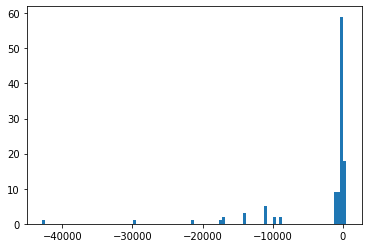

In [11]:
delays_file = open("../delay_data/named_rapid_transit_delays.json", 'r')
delays_json = delays_file.read()
delays_file.close()

delays = json.loads(delays_json)
fig, ax = plt.subplots()
hist = ax.hist(delays.values(), bins=100)

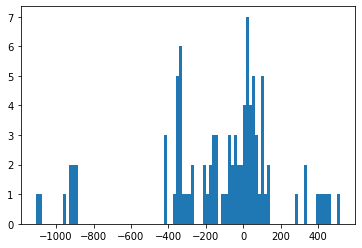

In [12]:
# remove outliers
delays = dict((s, d) for s, d in delays.items() if d > -5000)

fig, ax = plt.subplots()
hist = ax.hist(delays.values(), bins=100)

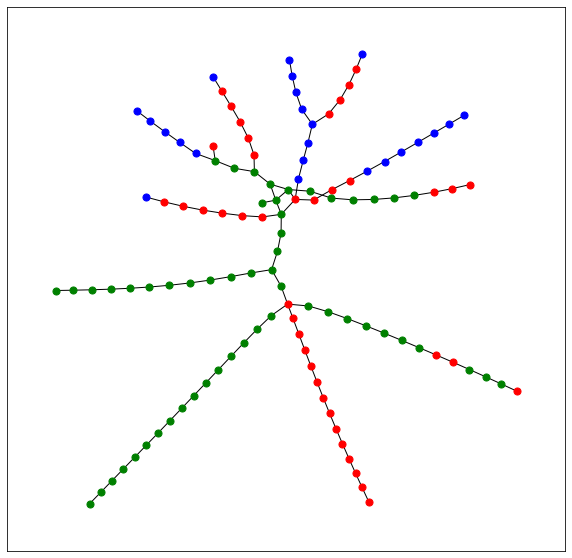

In [13]:
nx.set_node_attributes(network, delays, "avg_delay")

# proof of concept for coloring nodes; for now just split into positive and negative delays
# later we can split into bins
nonnegative_delay_nodes = [n for (n, delay) in nx.get_node_attributes(network, "avg_delay").items() if delay >= 0]
negative_delay_nodes = [n for (n, delay) in nx.get_node_attributes(network, "avg_delay").items() if delay < 0]
remaining_nodes = list(set(network.nodes()) - set(nonnegative_delay_nodes) - set(negative_delay_nodes))

fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network)
nx.draw_networkx_nodes(network, layout, nodelist=nonnegative_delay_nodes, node_color='red', node_size=50)
nx.draw_networkx_nodes(network, layout, nodelist=negative_delay_nodes, node_color='green', node_size=50)
nx.draw_networkx_nodes(network, layout, nodelist=remaining_nodes, node_color='blue', node_size=50)
nx.draw_networkx_edges(network, layout)

## Weighted edges

In [14]:
network.edges()

EdgeView([('Hawes Street', 'Kent Street'), ('Hawes Street', "Saint Mary's Street"), ('Quincy Center', 'Wollaston'), ('Quincy Center', 'Quincy Adams'), ('Coolidge Corner', 'Saint Paul Street'), ('Coolidge Corner', 'Summit Avenue'), ('Heath Street', 'Back of the Hill'), ('Broadway', 'Andrew'), ('Broadway', 'South Station'), ('Massachusetts Avenue', 'Back Bay'), ('Massachusetts Avenue', 'Ruggles'), ('Bowdoin', 'Government Center'), ('Forest Hills', 'Green Street'), ('Washington Street', 'Sutherland Road'), ('Washington Street', 'Warren Street'), ('Brookline Hills', 'Beaconsfield'), ('Brookline Hills', 'Brookline Village'), ('Magoun Square', 'Gilman Square'), ('Magoun Square', 'Ball Square'), ('Northeastern University', 'Symphony'), ('Northeastern University', 'Museum of Fine Arts'), ('Griggs Street', 'Allston Street'), ('Griggs Street', 'Harvard Avenue'), ('Quincy Adams', 'Braintree'), ('Kenmore', 'Hynes Convention Center'), ('Kenmore', 'Fenway'), ('Kenmore', 'Blandford Street'), ('Kenmor

In [15]:
dict_of_delay = nx.get_node_attributes(network, "avg_delay")

def get_delay(node_name, attribute_dict = dict_of_delay):
    try:
      attribute_val = attribute_dict[node_name]
    except:
      attribute_val = 0
    return attribute_val

In [16]:
get_delay('Assembly', dict_of_delay)

70.1666666666667

/Users/bowenzheng/opt/anaconda3/lib/python3.9/site-packages/networkx/drawing/layout.py:725: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)


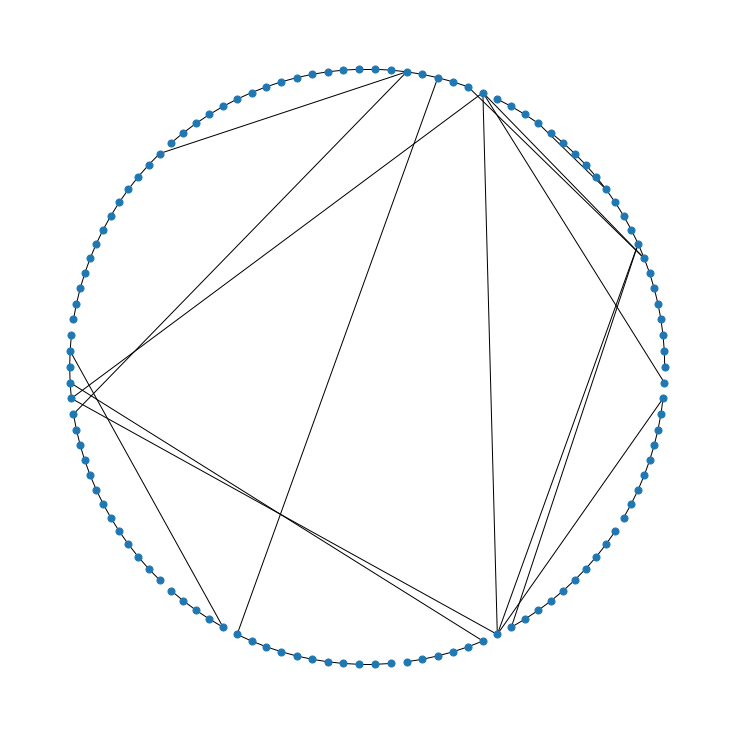

In [17]:
def open_line_file(filename):
    with open(f'../lines_from_gtfs_static_data/{filename}.txt', 'r') as f:
      lines = f.readlines()
    return lines

line_files = [
    'Red-C1-0',
    'Red-C1-1',
    'Red-C2-0',
    'Red-C2-1',
    'Green-B-C1-0',
    'Green-B-C1-1',
    'Green-C-C1-0',
    'Green-C-C1-1',
    'Green-D-C1-0',
    'Green-D-C1-1',
    'Green-E-C1-0',
    'Green-E-C1-1',
    'Orange-C1-0',
    'Orange-C1-1',
    'Blue-C1-0',
    'Blue-C1-1'
]

line_stations = map(open_line_file, line_files)

stations = set()
edges = set()

network2 = nx.Graph()

for line in line_stations:
    for i in range(len(line)-1):
        stop_name = line[i].rstrip()
        next_stop_name = line[i+1].rstrip()
        stations.add(stop_name)
        w = 0.5*(get_delay(stop_name, dict_of_delay) + get_delay(next_stop_name, dict_of_delay))
        if w < 0:
            w=0
        network2.add_edge(stop_name, next_stop_name, weight = w)   
    end_stop_name = line[-1].rstrip()
    stations.add(end_stop_name)


network2.add_nodes_from(stations)


fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network2)
nx.draw(network2, layout, node_size=50)

In [18]:
network2.edges(data=True)

EdgeDataView([('Alewife', 'Davis', {'weight': 230.375}), ('Davis', 'Porter', {'weight': 488.675}), ('Porter', 'Harvard', {'weight': 473.1}), ('Harvard', 'Central', {'weight': 383.6}), ('Central', 'Kendall/MIT', {'weight': 307.63333333333355}), ('Kendall/MIT', 'Charles/MGH', {'weight': 301.166666666667}), ('Charles/MGH', 'Park Street', {'weight': 0}), ('Park Street', 'Downtown Crossing', {'weight': 0}), ('Park Street', 'Government Center', {'weight': 0}), ('Park Street', 'Boylston', {'weight': 0}), ('Downtown Crossing', 'South Station', {'weight': 61.5714285714285}), ('Downtown Crossing', 'State', {'weight': 28.6964285714285}), ('Downtown Crossing', 'Chinatown', {'weight': 105.14285714285705}), ('South Station', 'Broadway', {'weight': 0.0}), ('Broadway', 'Andrew', {'weight': 0.0}), ('Andrew', 'JFK/UMass', {'weight': 0.0}), ('JFK/UMass', 'North Quincy', {'weight': 29.0}), ('JFK/UMass', 'Savin Hill', {'weight': 0.0}), ('North Quincy', 'Wollaston', {'weight': 98.5}), ('Wollaston', 'Quincy 

## OK lets see if this works

In [19]:
def normalize_graph(G):
    
    # Get list of old edge weights
    old_edge_weights = [data['weight'] for node1, node2, data in G.edges(data=True)]
    # Calculate mean of old edge weights
    mean_old_edge_weights = sum(old_edge_weights)/len(old_edge_weights)
    
    # importing Statistics module
    import statistics
    # Calculate standard deviation of old edge weights
    stdev_old_edge_weights = statistics.stdev(old_edge_weights)
    
    # Create new graph we will add edges to 
    new_G = nx.Graph()
    new_G.add_nodes_from(list(G))
    for node1, node2, data in G.edges(data=True):
        # Z-score
        std_weight = (data['weight'] - mean_old_edge_weights)/stdev_old_edge_weights
        # New standard deviation of: std_weight/5
        std_weight = std_weight/5
        # New mean of 1
        std_weight = std_weight + 1

        # if less than 0, turn to 0
        if std_weight < 0:
            std_weight = 0
            
        # Add new weights to new graph
        new_G.add_edge(node1, node2, weight = std_weight)
        
    return new_G
        

In [20]:
network3 = normalize_graph(network2)

In [21]:
network3.edges(data=True)

EdgeDataView([('Alewife', 'Davis', {'weight': 1.4026130044371174}), ('Davis', 'Porter', {'weight': 1.946429391300573}), ('Porter', 'Harvard', {'weight': 1.9136382948027089}), ('Harvard', 'Central', {'weight': 1.7252079168535053}), ('Central', 'Kendall/MIT', {'weight': 1.56527017705975}), ('Kendall/MIT', 'Charles/MGH', {'weight': 1.5516554681874426}), ('Charles/MGH', 'Park Street', {'weight': 0.9175890008611646}), ('Park Street', 'Downtown Crossing', {'weight': 0.9175890008611646}), ('Park Street', 'Government Center', {'weight': 0.9175890008611646}), ('Park Street', 'Boylston', {'weight': 0.9175890008611646}), ('Downtown Crossing', 'South Station', {'weight': 1.047219476353753}), ('Downtown Crossing', 'State', {'weight': 0.9780055246768807}), ('Downtown Crossing', 'Chinatown', {'weight': 1.138953339521362}), ('South Station', 'Broadway', {'weight': 0.9175890008611646}), ('Broadway', 'Andrew', {'weight': 0.9175890008611646}), ('Andrew', 'JFK/UMass', {'weight': 0.9175890008611646}), ('JF

## Ok lets see if our formula works on it...

In [22]:
# For Concert/Stadium Stations

# get f
f = np.zeros((1,len(NL)))
busy_station_indices = station_id_to_index(Destination_station_ids)
for i in busy_station_indices:
    f[0][i[1]] = 1
    
# Get adjacency matrix
A_stadium = nx.adjacency_matrix(network)
A_stadium = A_stadium.toarray()

# epsilon
epsilon = 0.1


# Calculate
get_ranked_stations(rlp(f, A_stadium, epsilon, 3))

/var/folders/pt/jr498z5x1ps1c_06b_yz91gh0000gn/T/ipykernel_56758/3648908160.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A_stadium = nx.adjacency_matrix(network)


('Haymarket',
 'Hynes Convention Center',
 'Fenway',
 "Saint Mary's Street",
 'Blandford Street',
 'Science Park/West End',
 'Community College',
 'Kenmore',
 'Central',
 'Porter',
 'North Station',
 'Harvard',
 'State',
 'Government Center',
 'Hawes Street',
 'Sullivan Square',
 'Longwood',
 'Lechmere',
 'Kendall/MIT',
 'Davis',
 'Boston University East',
 'Copley',
 'Bowdoin',
 'Union Square',
 'Downtown Crossing',
 'Alewife',
 'Aquarium',
 'Kent Street',
 'Assembly',
 'Park Street',
 'Brookline Village',
 'Prudential',
 'East Somerville',
 'Arlington',
 'Charles/MGH',
 'Boston University Central')

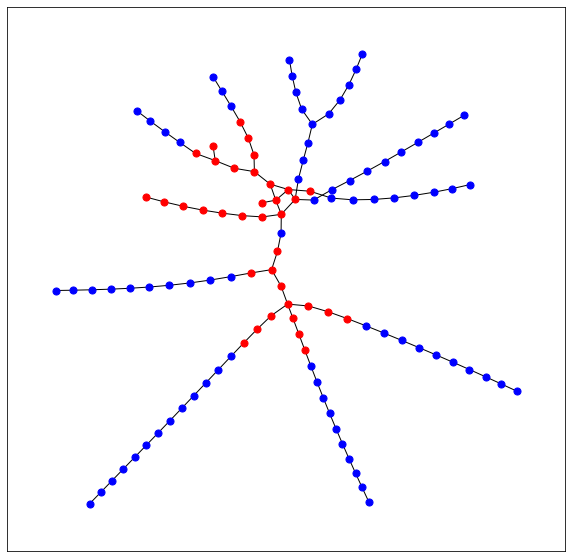

In [24]:
# proof of concept for coloring nodes; for now just split into positive and negative delays
# later we can split into bins
important_stations = list(get_ranked_stations(rlp(f, A_stadium, epsilon, 3)))
remaining_nodes = list(set(network.nodes()) - set(important_stations))

fig = plt.figure(figsize=(10, 10))
layout = nx.kamada_kawai_layout(network)
nx.draw_networkx_nodes(network, layout, nodelist=important_stations, node_color='red', node_size=50)
nx.draw_networkx_nodes(network, layout, nodelist=remaining_nodes, node_color='blue', node_size=50)
nx.draw_networkx_edges(network, layout)